In [23]:
from time import time

In [28]:
import numpy as np
import pandas as pd
import networkx as nx
import igraph as ig
#import networkit as nk

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('talk')

In [14]:
m = 5
N = 1000
g_nx = nx.barabasi_albert_graph(N, m)
print(nx.info(g_nx))

Graph with 1000 nodes and 4975 edges


In [15]:
%time btw = nx.betweenness_centrality(g_nx)

CPU times: user 4.09 s, sys: 0 ns, total: 4.09 s
Wall time: 4.1 s


In [16]:
g_ig = ig.Graph.TupleList(g.edges())
print(g_ig.summary())

IGRAPH UN-- 1000 4975 -- 
+ attr: name (v)


In [17]:
%time btw = g_ig.betweenness()

CPU times: user 96.7 ms, sys: 0 ns, total: 96.7 ms
Wall time: 101 ms


In [38]:
sizes = np.logspace(2, 4, 8).astype(int)
print(sizes)
data = []
for N in sizes:
    print(N)
    g_nx = nx.barabasi_albert_graph(N, m)
    g_ig = ig.Graph.TupleList(g_nx.edges())
    
    start = time()
    nx.betweenness_centrality(g_nx)
    end = time()
    nx_time = end - start
    
    start = time()
    g_ig.betweenness()
    end = time()
    ig_time = end - start
    
    data.append([N, nx_time, ig_time])
    
df = pd.DataFrame(data, columns=['N', 'networkx', 'igraph'])

100
193
372
719
1389
2682
5179
10000


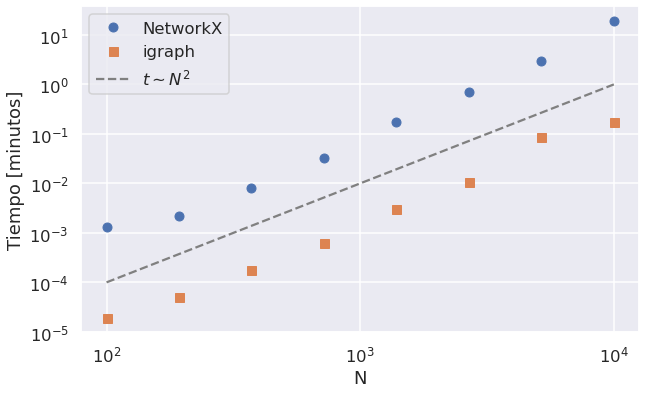

In [47]:
def powerlaw(x, a, c):
    return c*x**a

fig, ax = plt.subplots(figsize=(10,6))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('N')
ax.set_ylabel('Tiempo [minutos]')
ax.plot(df.N, df.networkx/60, 'o', label='NetworkX')
ax.plot(df.N, df.igraph/60, 's', label='igraph')

ax.plot(sizes, powerlaw(sizes, 2, 1e-8), '--', color='gray', label=r'$t \sim N^2$')

ax.legend()
plt.show()

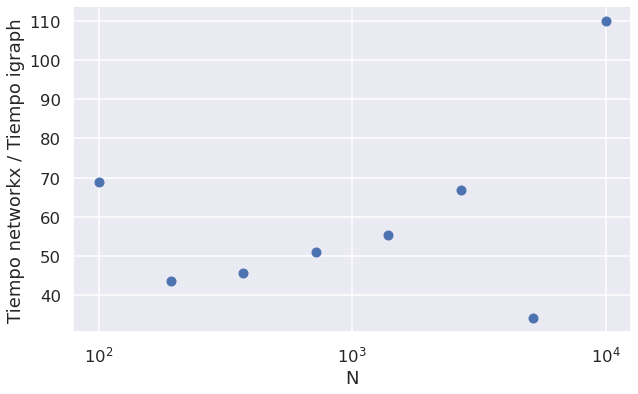

In [48]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_xscale('log')
ax.set_xlabel('N')
ax.set_ylabel('Tiempo networkx / Tiempo igraph')
ax.plot(df.N, df.networkx/df.igraph, 'o')
plt.show()

In [61]:
c = (df.networkx / df.N**2).mean()
N = 40000
a = 2
tiempo =powerlaw(N, a, c) / 60
print(f'Tiempo estimado para N = {N}: {tiempo:.0f} minutos')

Tiempo estimado para N = 40000: 160 minutos
